LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as ml
import pandas as pd
%matplotlib inline

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


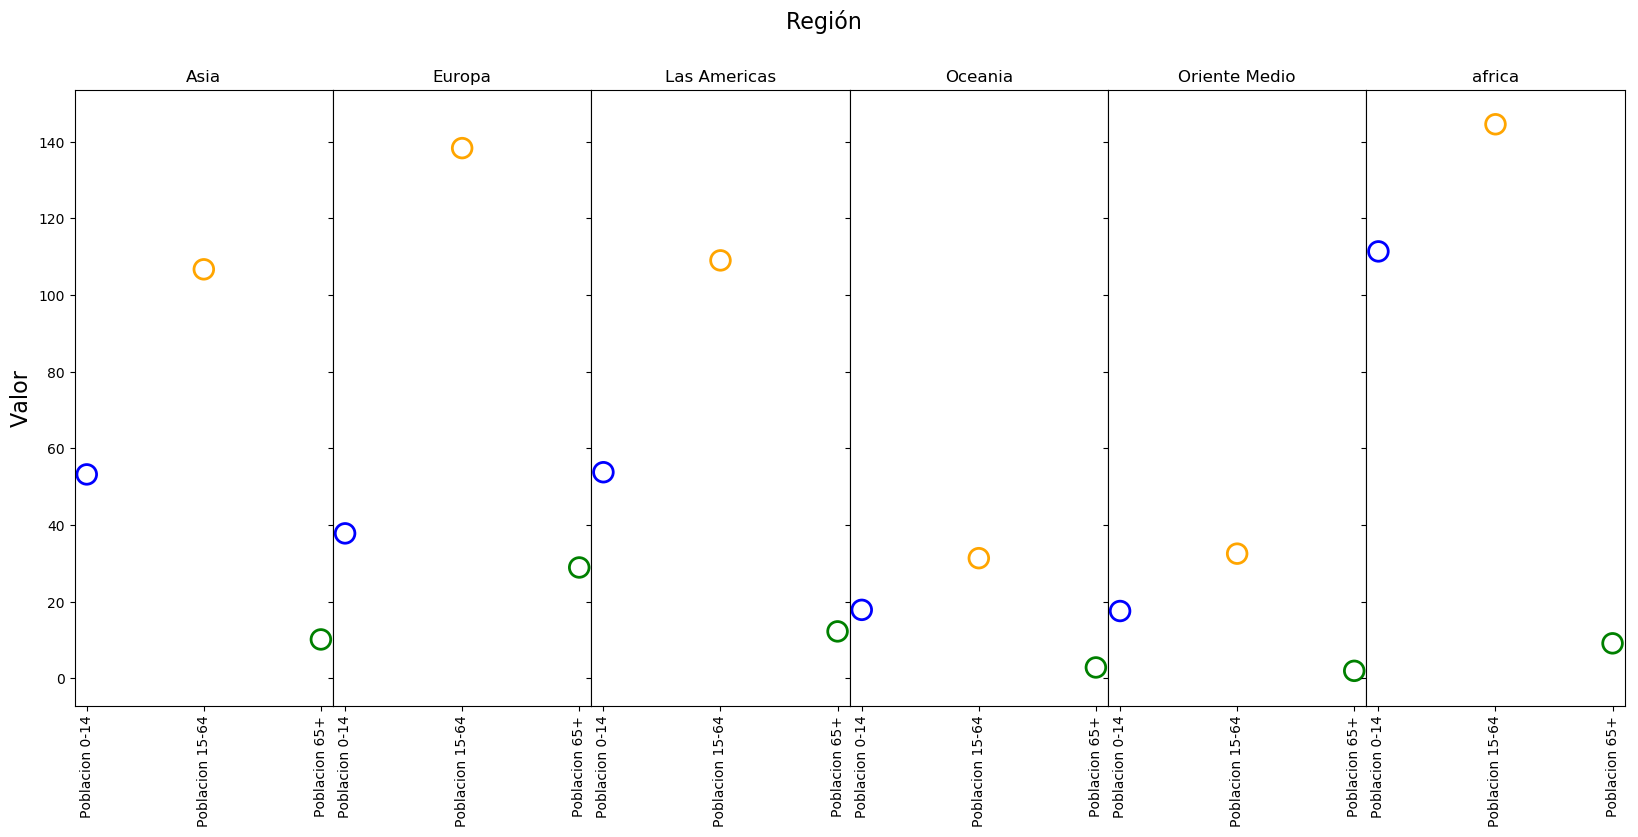

In [6]:
df = pd.read_csv('indicadores-mundiales.csv',sep=',', encoding='latin-1')
data=df[['Region', 'Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
data = data.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
data1 = data.T
fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(20, 8));
plt.subplots_adjust(wspace = 0, hspace=0.5)
plt.style.use('default')
fig.suptitle("Región" , fontsize=16)
colors = ['blue', 'orange', 'green']
axs[0].set_ylabel('Valor', fontsize=16)
for i, colname in enumerate(data1.columns):
    axs[i].scatter(list(data1.index), data1[colname], s=200, edgecolors=colors, linewidths=2, facecolors='none')
    axs[i].set_title(colname)
    plt.style.use('default')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)


## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


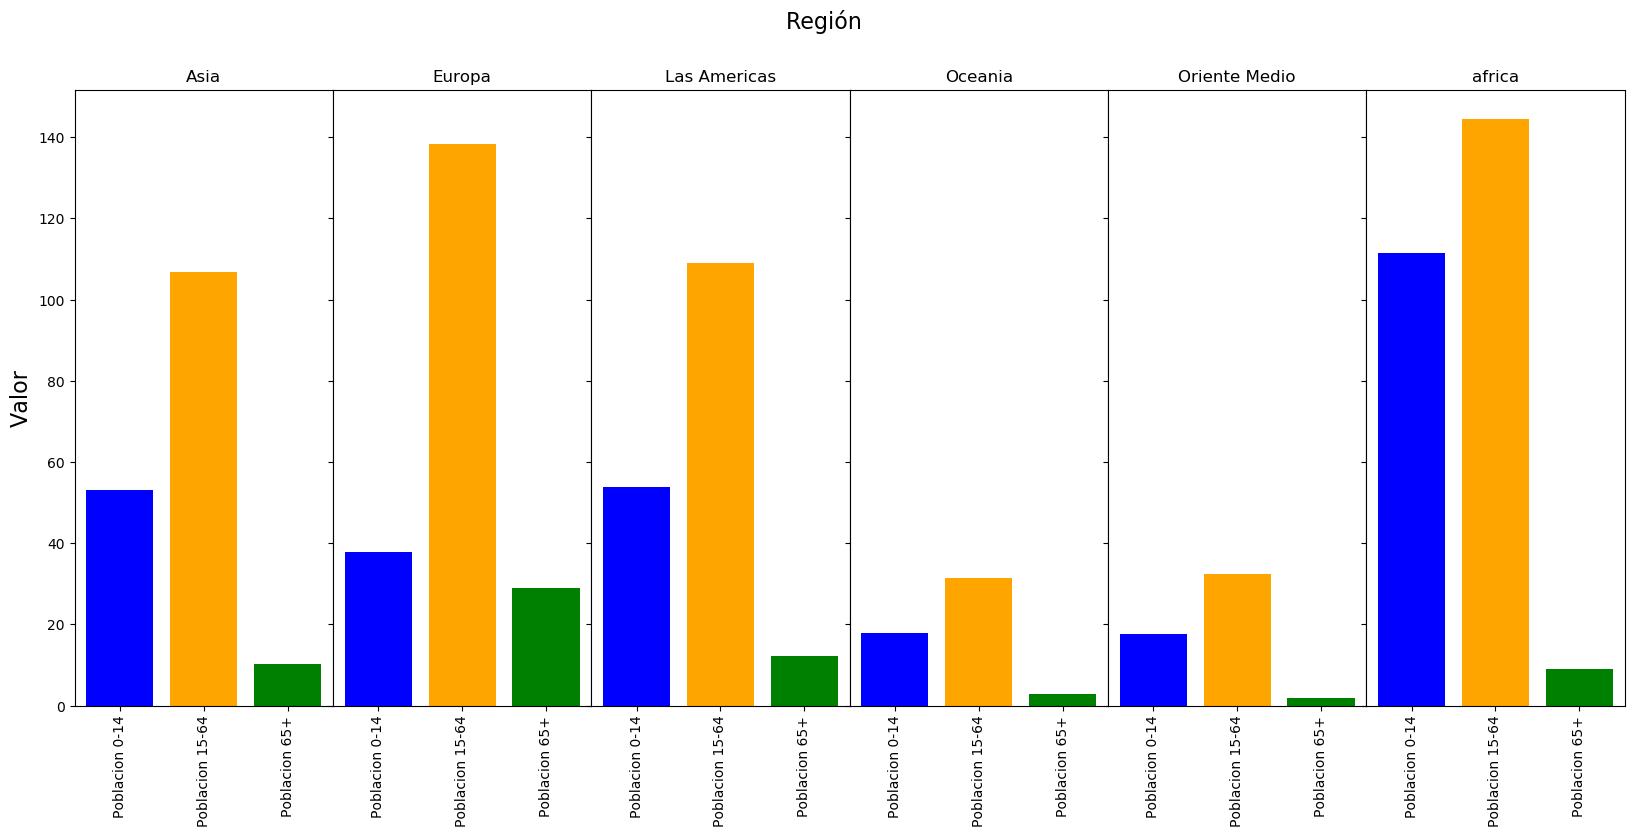

In [7]:
data = data.sort_values('Region')
data2 = data.T
fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(20, 8));
plt.subplots_adjust(wspace = 0, hspace=0.1)
plt.style.use('default')
fig.suptitle("Región" , fontsize=16)
colors = ['blue', 'orange', 'green']
axs[0].set_ylabel('Valor', fontsize=16)
for i, colname in enumerate(data2.columns):
    axs[i].bar(list(data2.index), data2[colname], color=colors)
    axs[i].set_title(colname)
    plt.style.use('default')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

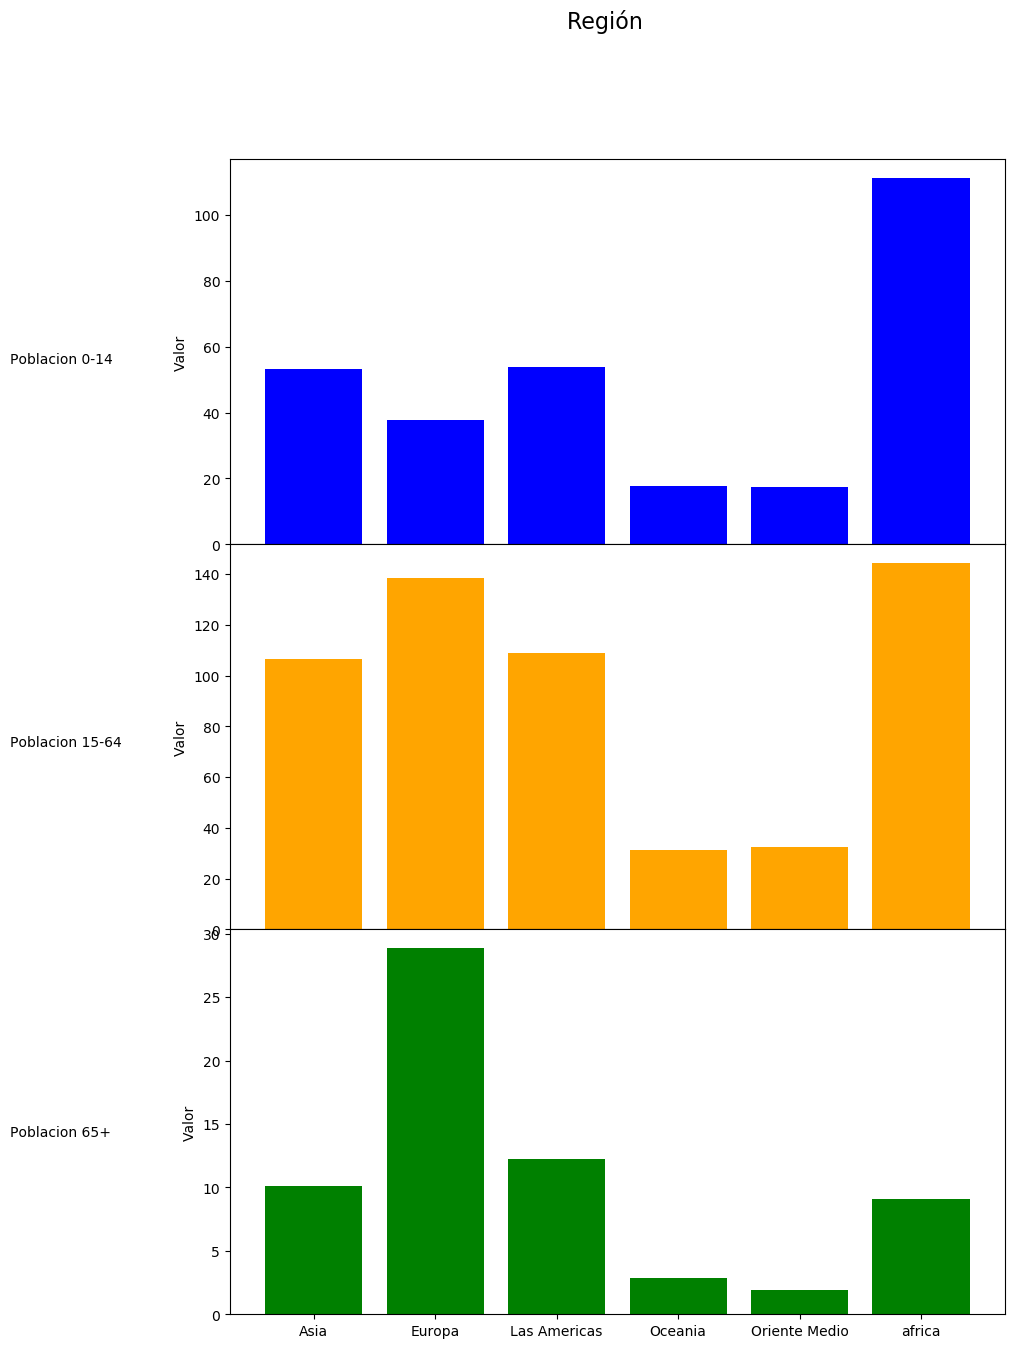

In [8]:
data=df[['Region', 'Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
data = data.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
fig, axs = plt.subplots(3, figsize=(10, 15), sharex=True);
plt.subplots_adjust(wspace = 0.0, hspace=0.0)
fig.suptitle("Región", fontsize=16)
colors=['blue','orange','green']
for index, colname in enumerate(data.columns):
    axs[index].bar(list(data.index), data[colname], color=colors[index])
    axs[index].text(-2.5, int(max(list(data[colname])) / 2), s=colname)
    axs[index].set_ylabel('Valor')

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

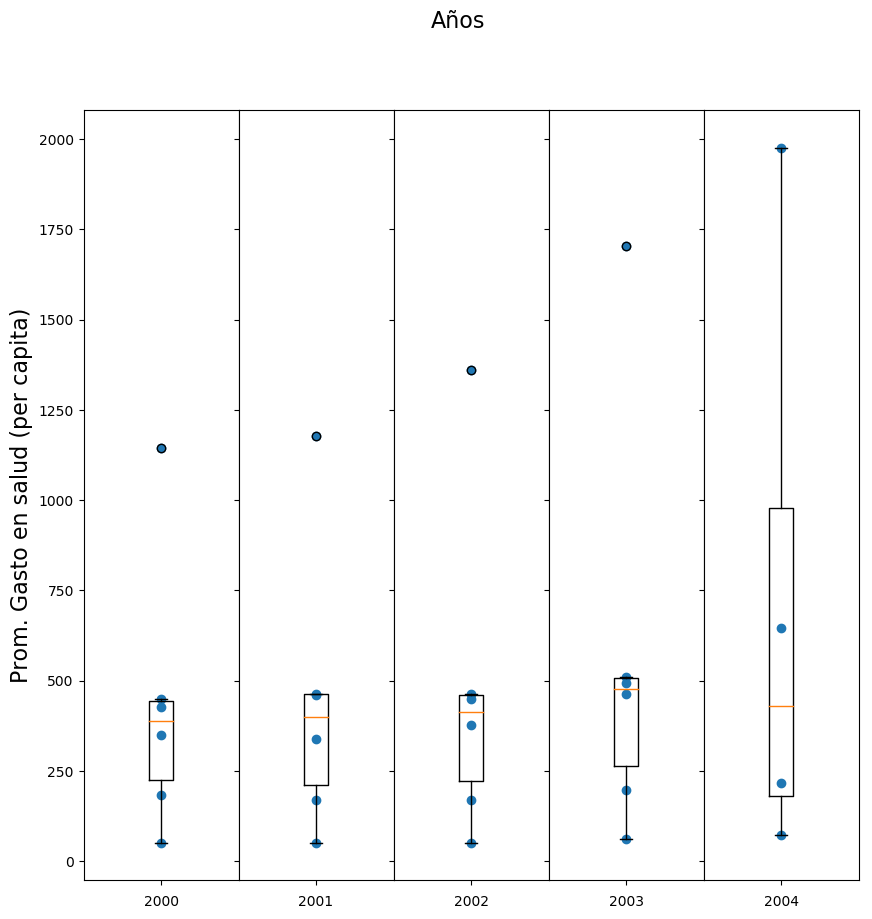

In [9]:
df['Ano'] = pd.to_datetime(df['Ano'])
df['Año'] = df['Ano'].map(lambda x: x.year)
data3 = df.groupby(['Año', 'Region'])['Gasto en salud (per capita)'].mean()
data3=data3.to_frame()
data3.reset_index(inplace=True)  
data3=data3.drop(['Region'], axis=1)
data3 =data3.dropna()

fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(10, 10));
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
fig.suptitle("Años", fontsize=16)
colors = ['blue', 'orange', 'green']
plt.style.use('default')
axs[0].set_ylabel('Prom. Gasto en salud (per capita)' , fontsize=16)
for i, colname in enumerate(data3['Año'].unique()):
    axs[i].boxplot(list(data3[data3['Año'] == colname].T.values[1]))
    axs[i].scatter(np.ones(data3[data3['Año'] == colname]['Gasto en salud (per capita)'].shape[0]), data3[data3['Año'] == colname]['Gasto en salud (per capita)'])
    axs[i].set_xticklabels([""])
    axs[i].set_xlabel(colname)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(0)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

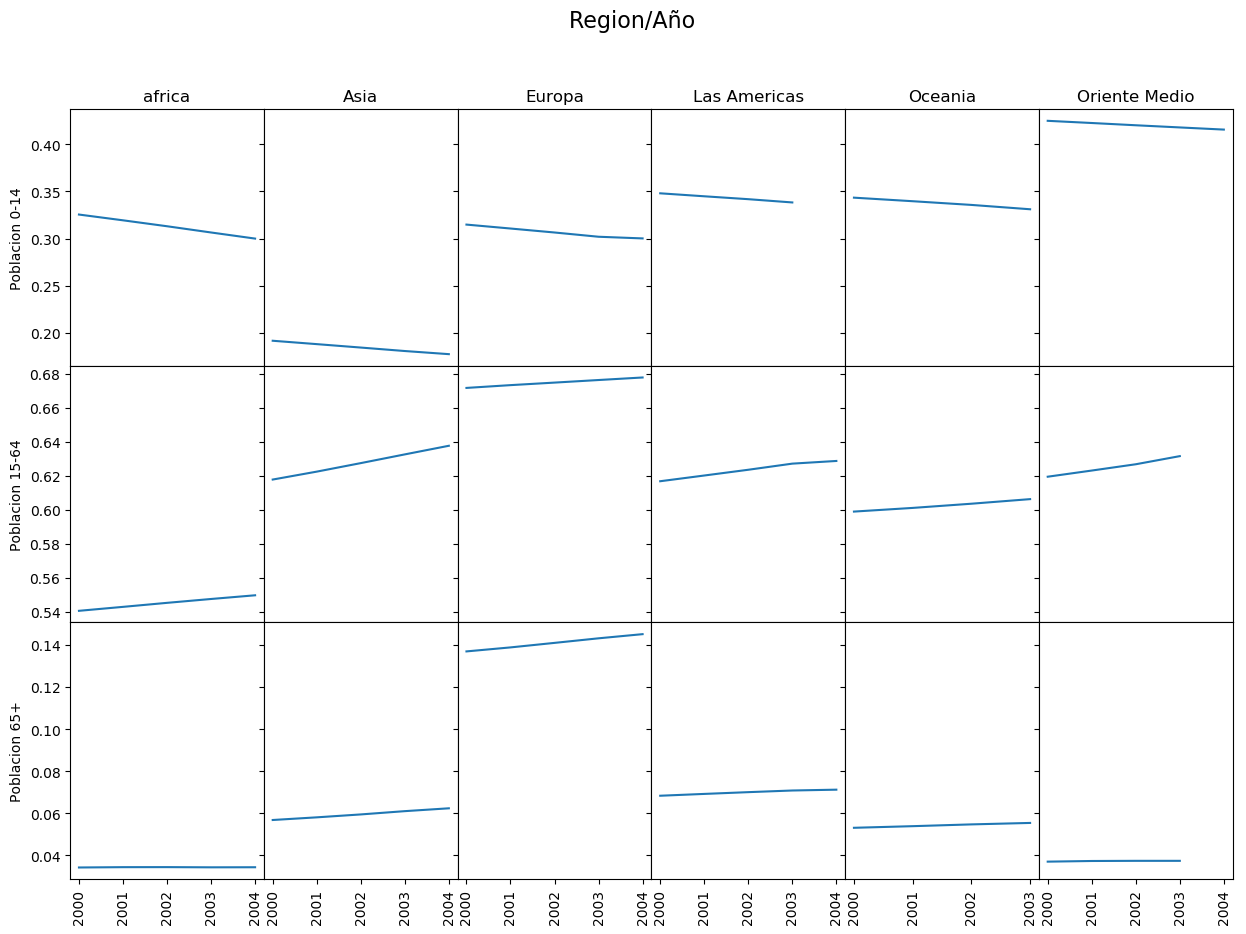

In [10]:
df = pd.read_csv('indicadores-mundiales.csv',sep=',', encoding='latin-1')
data4=[]
data4 = [ z.split('-')[0] for z in df.Ano]
df['soloano']=data4
Anios= df.soloano.unique()
data5=pd.DataFrame()
fig, axs = plt.subplots(3, 6, sharex='col', sharey='row', figsize=(15, 10))
fig.suptitle('Region/Año', fontsize=16)
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('default')
lista=['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']
for w, indname in enumerate(lista):
    for i, Anio in enumerate(Anios):
        y=(df[df['soloano'] == Anio].groupby('Region')[indname].mean()/100)
        data5[Anio]=y
        y=[]
    data5.index=df['Region'].unique()
    data5T=data5.T
    for i, colname in enumerate(data5T.columns):
        axs[w,i].plot(data5T[colname])
        if w==0:
            axs[w,i].set_title(colname)
        if i==0:
            axs[w,i].set_ylabel(indname)
        for tick in axs[w,i].get_xticklabels():
            tick.set_rotation(90)

---